In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.GPTS_Kernels import RBFKernel
import helpers.GP_opt_sims as GP
from tqdm.notebook import tqdm

In [35]:
def genFunc(func_info, beta):
    if(func_info[0] == 0):
        _, m, o, l = func_info
        truef = lambda x: o * np.exp(-(x-m)*(x-m)/l)
        return GP.GPFunction(truef, 1/beta, [0, 1], [m, o])

In [41]:
beta = 15 #precision of sampling noise
func = genFunc([0, 0.5, 2, 1/200], beta)
kernel = RBFKernel(200)
N = 0
data_X = np.array([np.random.uniform(func.x_min, func.x_max, size = N)]).T
#data_Y = np.vectorize(func.sample)(data_X)
data_Y = []
T = 400
#data_Y = []
#print(data_X)

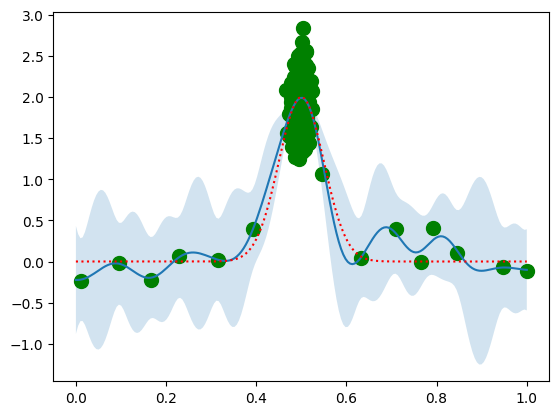

<Figure size 640x480 with 0 Axes>

In [42]:
rew, data_unused= GP.AR_lvl_set(T, func, data_X, data_Y, kernel, beta, 1, show_plot=True)

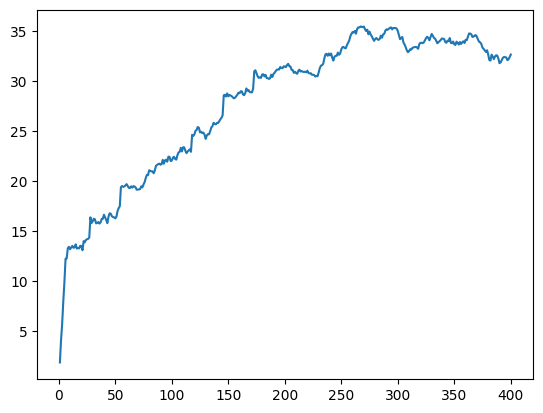

In [40]:
reg = func.opt - np.array(rew)
plt.plot(np.arange(1, T+1), np.cumsum(reg))